# Earth-Moon-Sun Orbit simulation

##### Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import celluloid as c

## Define Scaling

In [12]:
SCALING = 0.5 # How many AU per 1 on graph

## Define Constants

In [13]:
EARTH_MASS = 5.97e24 #kg
EARTH_RADIUS = 6400e3 # Radius in m

SOLAR_MASS = 1.989e30 #kg
SOLAR_RADIUS = 696340e3 # Radius in m

MOON_MASS = 7.348e22 # Approximate Mass of Moon [kg]
MOON_RADIUS = 1737.4e3 # Moon Radius in m

## Planet Class

In [14]:
class Planet():
    def __init__(self,mass,radius,position:tuple[float,0]):

        self.G = 6.67e-11

        # Masses
        self.SunMass = SOLAR_MASS


        # Planet Parameters
        self.mass = mass
        self.radius = radius
        self.position = np.array(position,dtype=np.float64) #position in AU (x,y)
        self.current_velocity = np.array([0,0],dtype=np.float64)


        self.position_magnitude = 0
        self.current_acceleration = 0
        self.gravitational_force = 0

        # Calculate the Initial Unit Vector
        self.scaling()
        self.update_position_mag()
        self.update_unit_vector()
        self.current_velocity = np.array([0,np.sqrt(self.G*self.SunMass/self.r)]) # Sets an Initial Velocity


    def scaling(self):
        """Scales values such that mass is in earth masses
           position in AU
           time in Days"""
        self.mass = self.mass / EARTH_MASS
        self.SunMass = self.SunMass / EARTH_MASS


        AU = 1.5e11 * SCALING

        self.G = self.G * (((86400**2) * (EARTH_MASS)) / ((AU)**3))

    def update_position_mag(self):
        self.r = np.linalg.norm(self.position)

    def update_unit_vector(self):
        """Calculates the position unit vector"""

        self.r_hat = self.position/self.r

    def calculate_gravitational_force(self,Mass):

        gravitational_force =  (- (self.G * self.mass * Mass) / ((self.r)**2)) * self.r_hat
        self.gravitational_force += gravitational_force

        return gravitational_force

    def velocity(self,time_step): # Time step in Days
        """Gives the velocity vector for a circular orbit"""
        self.current_acceleration = self.gravitational_force / self.mass # Acceleration in AU/Day^2

        self.current_velocity += (self.current_acceleration * time_step) # Velocity in AU/Day

        return self.current_velocity

    def update_position(self,time_step):
        self.position += (self.current_velocity * time_step)
        self.update_position_mag()
        self.update_unit_vector()

        self.gravitational_force = 0 # Resets Gravitational force for next calculation 

### Running the Simulation

#### Define Objects and calculated positions over course of N orbits

In [15]:
Earth = Planet(EARTH_MASS,EARTH_RADIUS,(1/SCALING,0/SCALING)) # Earth starts at a distance of 1 AU
Sun = Planet(SOLAR_MASS,SOLAR_RADIUS,(0/SCALING,0/SCALING))
Moon = Planet(MOON_MASS,MOON_RADIUS,((1+0.00256)/SCALING,0/SCALING)) # Moon Orbit Radius approx 0.00256 AU

time_step = 1 #Time Step of 1 Day --> 365 steps for 1 orbit

Earth_positions = np.ones((365,2))
Moon_Positions = np.ones((365,2))

for i in range(365):
    Earth_positions[i] = Earth.position
    Moon_Positions[i] = Moon.position

    # Calculate and sum gravitational contributions of all other bodies
    Earth.calculate_gravitational_force(Sun.mass)
    Earth.calculate_gravitational_force(Moon.mass)

    Moon.calculate_gravitational_force(Earth.mass)
    Moon.calculate_gravitational_force(Sun.mass)


    # Update velocities for bodies
    Earth.velocity(time_step)
    Moon.velocity(time_step)

    # Update Positions for bodies
    Earth.update_position(time_step)
    Moon.update_position(time_step)


/var/folders/0y/2j4r476n4859g4w7hklsh2r80000gn/T/ipykernel_49532/1881071653.py:46: RuntimeWarning: invalid value encountered in divide
  self.r_hat = self.position/self.r
/var/folders/0y/2j4r476n4859g4w7hklsh2r80000gn/T/ipykernel_49532/1881071653.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  self.current_velocity = np.array([0,np.sqrt(self.G*self.SunMass/self.r)]) # Sets an Initial Velocity


#### Plot and Create Animation

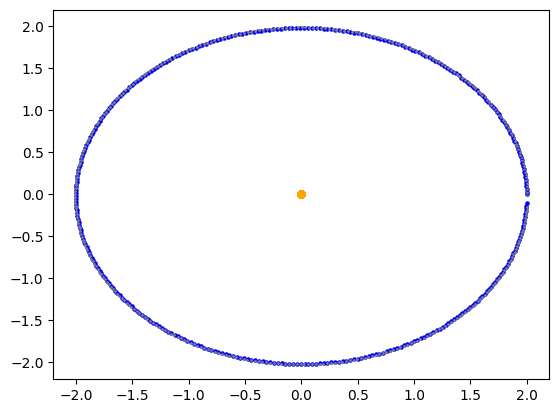

MovieWriter ffmpeg unavailable; using Pillow instead.


In [16]:
fig = plt.figure()
plt.xlim(-2.2,2.2)
plt.ylim(-2.2,2.2)
cam = c.Camera(fig)

for i in range(Earth_positions.shape[0]):

    plt.scatter(Sun.position[0],Sun.position[1],s=25,c="orange")
    plt.scatter(Earth_positions[i,0],Earth_positions[i,1],s=5,c="blue")
    plt.scatter(Moon_Positions[i,0],Moon_Positions[i,1],s=1,c="gray")
    
    cam.snap()
plt.show()
anim = cam.animate(interval=1,repeat=True)
anim.save("Orbit_Animation.gif",fps=60)